In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

objc[19461]: Class CaptureDelegate is implemented in both /Users/kevynkrancenblum/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/cv2/cv2.abi3.so (0x284cae480) and /Users/kevynkrancenblum/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/mediapipe/.dylibs/libopencv_videoio.3.4.16.dylib (0x13d948860). One of the two will be used. Which one is undefined.
objc[19461]: Class CVWindow is implemented in both /Users/kevynkrancenblum/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/cv2/cv2.abi3.so (0x284cae4d0) and /Users/kevynkrancenblum/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/mediapipe/.dylibs/libopencv_highgui.3.4.16.dylib (0x12d95ca68). One of the two will be used. Which one is undefined.
objc[19461]: Class CVView is implemented in both /Users/kevynkrancenblum/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/cv2/cv2.abi3.so (0x284cae4f8) and /Users/kevynkrancenblum/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/mediapipe/.dyl

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [5]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [6]:
DATA_PATH = os.path.join('/Users/kevynkrancenblum/Desktop/Data Science/ComputerVision/MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [9]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [7]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [8]:
label_map = {label:num for num, label in enumerate(actions)}

In [9]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [10]:
X = np.array(sequences)
y = to_categorical(labels).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [12]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [13]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2022-11-13 13:41:48.400683: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-13 13:41:48.400869: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [14]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [17]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000


2022-10-18 10:11:40.543062: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-18 10:11:41.247343: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 10s 3s/step - loss: 3.4268 - categorical_accuracy: 0.3529
Epoch 2/2000
3/3 [==============================] - 8s 3s/step - loss: 5.2730 - categorical_accuracy: 0.2824
Epoch 3/2000
3/3 [==============================] - 8s 3s/step - loss: 13.1166 - categorical_accuracy: 0.3294
Epoch 4/2000
3/3 [==============================] - 8s 3s/step - loss: 6.2926 - categorical_accuracy: 0.3294
Epoch 5/2000
3/3 [==============================] - 8s 3s/step - loss: 6.9228 - categorical_accuracy: 0.3294
Epoch 6/2000
3/3 [==============================] - 8s 3s/step - loss: 2.6346 - categorical_accuracy: 0.4353
Epoch 7/2000
3/3 [==============================] - 8s 3s/step - loss: 2.9075 - categorical_accuracy: 0.2941
Epoch 8/2000
3/3 [==============================] - 8s 3s/step - loss: 3.2638 - categorical_accuracy: 0.3176
Epoch 9/2000
3/3 [==============================] - 8s 3s/step - loss: 3.2024 - categorical_accuracy: 0.2941
Epoch 10/2000
3/3 [===========

3/3 [==============================] - 8s 3s/step - loss: 0.8920 - categorical_accuracy: 0.5176
Epoch 76/2000
3/3 [==============================] - 8s 3s/step - loss: 0.8486 - categorical_accuracy: 0.5647
Epoch 77/2000
3/3 [==============================] - 8s 3s/step - loss: 0.7994 - categorical_accuracy: 0.5529
Epoch 78/2000
3/3 [==============================] - 8s 3s/step - loss: 0.7515 - categorical_accuracy: 0.6588
Epoch 79/2000
3/3 [==============================] - 8s 3s/step - loss: 0.7317 - categorical_accuracy: 0.6706
Epoch 80/2000
3/3 [==============================] - 8s 3s/step - loss: 0.6792 - categorical_accuracy: 0.7059
Epoch 81/2000
3/3 [==============================] - 8s 3s/step - loss: 0.6275 - categorical_accuracy: 0.7529
Epoch 82/2000
3/3 [==============================] - 8s 3s/step - loss: 0.6111 - categorical_accuracy: 0.7294
Epoch 83/2000
3/3 [==============================] - 8s 3s/step - loss: 0.5607 - categorical_accuracy: 0.8235
Epoch 84/2000
3/3 [=====

3/3 [==============================] - 9s 3s/step - loss: 0.3320 - categorical_accuracy: 0.8941
Epoch 150/2000
3/3 [==============================] - 9s 3s/step - loss: 0.3338 - categorical_accuracy: 0.8941
Epoch 151/2000
3/3 [==============================] - 8s 3s/step - loss: 0.3411 - categorical_accuracy: 0.8941
Epoch 152/2000
3/3 [==============================] - 9s 3s/step - loss: 0.3302 - categorical_accuracy: 0.8941
Epoch 153/2000
3/3 [==============================] - 8s 3s/step - loss: 0.3303 - categorical_accuracy: 0.8941
Epoch 154/2000
3/3 [==============================] - 8s 3s/step - loss: 0.3391 - categorical_accuracy: 0.8941
Epoch 155/2000
3/3 [==============================] - 8s 3s/step - loss: 0.3149 - categorical_accuracy: 0.8941
Epoch 156/2000
3/3 [==============================] - 8s 3s/step - loss: 0.3350 - categorical_accuracy: 0.8941
Epoch 157/2000
3/3 [==============================] - 8s 3s/step - loss: 0.3185 - categorical_accuracy: 0.8941
Epoch 158/2000
3

3/3 [==============================] - 8s 3s/step - loss: 0.2887 - categorical_accuracy: 0.8941
Epoch 223/2000
3/3 [==============================] - 8s 3s/step - loss: 0.2731 - categorical_accuracy: 0.8941
Epoch 224/2000
3/3 [==============================] - 8s 3s/step - loss: 0.2657 - categorical_accuracy: 0.8941
Epoch 225/2000
3/3 [==============================] - 8s 3s/step - loss: 0.2907 - categorical_accuracy: 0.8706
Epoch 226/2000
3/3 [==============================] - 8s 3s/step - loss: 0.2576 - categorical_accuracy: 0.8941
Epoch 227/2000
3/3 [==============================] - 8s 3s/step - loss: 0.2845 - categorical_accuracy: 0.8941
Epoch 228/2000
3/3 [==============================] - 8s 3s/step - loss: 0.2600 - categorical_accuracy: 0.8941
Epoch 229/2000
3/3 [==============================] - 8s 3s/step - loss: 0.2525 - categorical_accuracy: 0.8941
Epoch 230/2000
3/3 [==============================] - 8s 3s/step - loss: 0.2757 - categorical_accuracy: 0.8706
Epoch 231/2000
3

3/3 [==============================] - 8s 3s/step - loss: 0.2597 - categorical_accuracy: 0.8941
Epoch 296/2000
3/3 [==============================] - 8s 3s/step - loss: 0.3512 - categorical_accuracy: 0.8588
Epoch 297/2000
3/3 [==============================] - 8s 3s/step - loss: 0.3402 - categorical_accuracy: 0.8824
Epoch 298/2000
3/3 [==============================] - 8s 3s/step - loss: 0.4544 - categorical_accuracy: 0.8118
Epoch 299/2000
3/3 [==============================] - 8s 3s/step - loss: 0.3947 - categorical_accuracy: 0.8706
Epoch 300/2000
3/3 [==============================] - 8s 3s/step - loss: 0.4061 - categorical_accuracy: 0.8588
Epoch 301/2000
3/3 [==============================] - 8s 3s/step - loss: 0.3838 - categorical_accuracy: 0.8471
Epoch 302/2000
3/3 [==============================] - 8s 3s/step - loss: 0.2966 - categorical_accuracy: 0.8941
Epoch 303/2000
3/3 [==============================] - 8s 3s/step - loss: 0.2771 - categorical_accuracy: 0.8941
Epoch 304/2000
3

3/3 [==============================] - 9s 3s/step - loss: 0.2307 - categorical_accuracy: 0.9059
Epoch 369/2000
3/3 [==============================] - 9s 3s/step - loss: 0.2208 - categorical_accuracy: 0.9176
Epoch 370/2000
3/3 [==============================] - 9s 3s/step - loss: 0.1922 - categorical_accuracy: 0.9294
Epoch 371/2000
3/3 [==============================] - 9s 3s/step - loss: 0.1697 - categorical_accuracy: 0.9294
Epoch 372/2000
3/3 [==============================] - 9s 3s/step - loss: 0.1596 - categorical_accuracy: 0.9294
Epoch 373/2000
3/3 [==============================] - 9s 3s/step - loss: 0.1649 - categorical_accuracy: 0.9059
Epoch 374/2000
3/3 [==============================] - 9s 3s/step - loss: 0.1963 - categorical_accuracy: 0.9294
Epoch 375/2000
3/3 [==============================] - 9s 3s/step - loss: 0.3860 - categorical_accuracy: 0.8000
Epoch 376/2000
3/3 [==============================] - 9s 3s/step - loss: 0.3101 - categorical_accuracy: 0.8588
Epoch 377/2000
3

3/3 [==============================] - 9s 3s/step - loss: 0.2387 - categorical_accuracy: 0.9412
Epoch 442/2000
3/3 [==============================] - 9s 3s/step - loss: 0.2714 - categorical_accuracy: 0.8706
Epoch 443/2000
3/3 [==============================] - 9s 3s/step - loss: 0.2435 - categorical_accuracy: 0.8941
Epoch 444/2000
3/3 [==============================] - 9s 3s/step - loss: 0.2596 - categorical_accuracy: 0.9176
Epoch 445/2000
3/3 [==============================] - 9s 3s/step - loss: 0.2336 - categorical_accuracy: 0.9294
Epoch 446/2000
3/3 [==============================] - 9s 3s/step - loss: 0.2255 - categorical_accuracy: 0.9059
Epoch 447/2000
3/3 [==============================] - 9s 3s/step - loss: 0.2069 - categorical_accuracy: 0.9294
Epoch 448/2000
3/3 [==============================] - 9s 3s/step - loss: 0.1659 - categorical_accuracy: 0.9294
Epoch 449/2000
3/3 [==============================] - 9s 3s/step - loss: 0.1698 - categorical_accuracy: 0.9294
Epoch 450/2000
3

3/3 [==============================] - 9s 3s/step - loss: 0.1623 - categorical_accuracy: 0.9529
Epoch 515/2000
3/3 [==============================] - 9s 3s/step - loss: 0.1620 - categorical_accuracy: 0.9412
Epoch 516/2000
3/3 [==============================] - 9s 3s/step - loss: 0.3404 - categorical_accuracy: 0.9176
Epoch 517/2000
3/3 [==============================] - 9s 3s/step - loss: 0.2732 - categorical_accuracy: 0.9294
Epoch 518/2000
3/3 [==============================] - 9s 3s/step - loss: 0.1669 - categorical_accuracy: 0.9412
Epoch 519/2000
3/3 [==============================] - 9s 3s/step - loss: 0.1676 - categorical_accuracy: 0.9176
Epoch 520/2000
3/3 [==============================] - 9s 3s/step - loss: 0.1640 - categorical_accuracy: 0.9059
Epoch 521/2000
3/3 [==============================] - 9s 3s/step - loss: 0.1434 - categorical_accuracy: 0.9176
Epoch 522/2000
3/3 [==============================] - 9s 3s/step - loss: 0.1622 - categorical_accuracy: 0.9412
Epoch 523/2000
3

3/3 [==============================] - 9s 3s/step - loss: 1.1209 - categorical_accuracy: 0.4118
Epoch 588/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0945 - categorical_accuracy: 0.3294
Epoch 589/2000
3/3 [==============================] - 9s 3s/step - loss: 1.1019 - categorical_accuracy: 0.3412
Epoch 590/2000
3/3 [==============================] - 9s 3s/step - loss: 1.1132 - categorical_accuracy: 0.4000
Epoch 591/2000
3/3 [==============================] - 9s 3s/step - loss: 1.1129 - categorical_accuracy: 0.3059
Epoch 592/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0968 - categorical_accuracy: 0.3412
Epoch 593/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0981 - categorical_accuracy: 0.3059
Epoch 594/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0892 - categorical_accuracy: 0.4471
Epoch 595/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0856 - categorical_accuracy: 0.3647
Epoch 596/2000
3

3/3 [==============================] - 9s 3s/step - loss: 1.0755 - categorical_accuracy: 0.4235
Epoch 661/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0832 - categorical_accuracy: 0.4235
Epoch 662/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0794 - categorical_accuracy: 0.3765
Epoch 663/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0741 - categorical_accuracy: 0.4000
Epoch 664/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0777 - categorical_accuracy: 0.4118
Epoch 665/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0832 - categorical_accuracy: 0.4118
Epoch 666/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0784 - categorical_accuracy: 0.3765
Epoch 667/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0829 - categorical_accuracy: 0.4118
Epoch 668/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0659 - categorical_accuracy: 0.4471
Epoch 669/2000
3

3/3 [==============================] - 9s 3s/step - loss: 1.0594 - categorical_accuracy: 0.4235
Epoch 734/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0411 - categorical_accuracy: 0.4353
Epoch 735/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0575 - categorical_accuracy: 0.3647
Epoch 736/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0534 - categorical_accuracy: 0.4353
Epoch 737/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0618 - categorical_accuracy: 0.3765
Epoch 738/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0490 - categorical_accuracy: 0.3647
Epoch 739/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0556 - categorical_accuracy: 0.4353
Epoch 740/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0462 - categorical_accuracy: 0.4235
Epoch 741/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0624 - categorical_accuracy: 0.3412
Epoch 742/2000
3

3/3 [==============================] - 9s 3s/step - loss: 1.0366 - categorical_accuracy: 0.4706
Epoch 807/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0413 - categorical_accuracy: 0.4353
Epoch 808/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0356 - categorical_accuracy: 0.4353
Epoch 809/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0459 - categorical_accuracy: 0.3765
Epoch 810/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0343 - categorical_accuracy: 0.4235
Epoch 811/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0435 - categorical_accuracy: 0.4235
Epoch 812/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0417 - categorical_accuracy: 0.4235
Epoch 813/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0634 - categorical_accuracy: 0.3647
Epoch 814/2000
3/3 [==============================] - 312s 3s/step - loss: 1.0536 - categorical_accuracy: 0.3882
Epoch 815/2000

3/3 [==============================] - 9s 3s/step - loss: 1.0434 - categorical_accuracy: 0.4588
Epoch 880/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0532 - categorical_accuracy: 0.4235
Epoch 881/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0442 - categorical_accuracy: 0.4353
Epoch 882/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0550 - categorical_accuracy: 0.3176
Epoch 883/2000
3/3 [==============================] - 8s 3s/step - loss: 1.0587 - categorical_accuracy: 0.4000
Epoch 884/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0535 - categorical_accuracy: 0.4353
Epoch 885/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0640 - categorical_accuracy: 0.3176
Epoch 886/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0467 - categorical_accuracy: 0.3647
Epoch 887/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0494 - categorical_accuracy: 0.4353
Epoch 888/2000
3

3/3 [==============================] - 9s 3s/step - loss: 1.0574 - categorical_accuracy: 0.3529
Epoch 953/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0564 - categorical_accuracy: 0.3765
Epoch 954/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0502 - categorical_accuracy: 0.4471
Epoch 955/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0467 - categorical_accuracy: 0.4118
Epoch 956/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0607 - categorical_accuracy: 0.3765
Epoch 957/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0441 - categorical_accuracy: 0.4353
Epoch 958/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0748 - categorical_accuracy: 0.4000
Epoch 959/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0367 - categorical_accuracy: 0.3412
Epoch 960/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0809 - categorical_accuracy: 0.3529
Epoch 961/2000
3

3/3 [==============================] - 9s 3s/step - loss: 1.0358 - categorical_accuracy: 0.4824
Epoch 1026/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0324 - categorical_accuracy: 0.4588
Epoch 1027/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0414 - categorical_accuracy: 0.4824
Epoch 1028/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0326 - categorical_accuracy: 0.4353
Epoch 1029/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0389 - categorical_accuracy: 0.4353
Epoch 1030/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0628 - categorical_accuracy: 0.3294
Epoch 1031/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0340 - categorical_accuracy: 0.4353
Epoch 1032/2000
3/3 [==============================] - 9s 3s/step - loss: 1.0394 - categorical_accuracy: 0.4471
Epoch 1033/2000
3/3 [==============================] - 8s 3s/step - loss: 1.0389 - categorical_accuracy: 0.3882
Epoch 10

3/3 [==============================] - 8s 3s/step - loss: 0.5802 - categorical_accuracy: 0.8000
Epoch 1099/2000
3/3 [==============================] - 8s 3s/step - loss: 0.5705 - categorical_accuracy: 0.8000
Epoch 1100/2000
3/3 [==============================] - 8s 3s/step - loss: 0.5788 - categorical_accuracy: 0.8118
Epoch 1101/2000
3/3 [==============================] - 8s 3s/step - loss: 0.5659 - categorical_accuracy: 0.8118
Epoch 1102/2000
3/3 [==============================] - 8s 3s/step - loss: 0.5657 - categorical_accuracy: 0.7882
Epoch 1103/2000
3/3 [==============================] - 9s 3s/step - loss: 0.5654 - categorical_accuracy: 0.8118
Epoch 1104/2000
3/3 [==============================] - 8s 3s/step - loss: 0.5619 - categorical_accuracy: 0.8118
Epoch 1105/2000
3/3 [==============================] - 8s 3s/step - loss: 0.5757 - categorical_accuracy: 0.7882
Epoch 1106/2000
3/3 [==============================] - 8s 3s/step - loss: 0.5508 - categorical_accuracy: 0.8118
Epoch 11

3/3 [==============================] - 8s 3s/step - loss: 0.4828 - categorical_accuracy: 0.8000
Epoch 1172/2000
3/3 [==============================] - 8s 3s/step - loss: 0.4713 - categorical_accuracy: 0.8118
Epoch 1173/2000
3/3 [==============================] - 9s 3s/step - loss: 0.4646 - categorical_accuracy: 0.8235
Epoch 1174/2000
3/3 [==============================] - 8s 3s/step - loss: 0.4609 - categorical_accuracy: 0.8000
Epoch 1175/2000
3/3 [==============================] - 9s 3s/step - loss: 0.4744 - categorical_accuracy: 0.8118
Epoch 1176/2000
3/3 [==============================] - 9s 3s/step - loss: 2.6149 - categorical_accuracy: 0.5294
Epoch 1177/2000
3/3 [==============================] - 8s 3s/step - loss: 2.8528 - categorical_accuracy: 0.3647
Epoch 1178/2000
3/3 [==============================] - 8s 3s/step - loss: 1.2831 - categorical_accuracy: 0.5294
Epoch 1179/2000
3/3 [==============================] - 8s 3s/step - loss: 1.1571 - categorical_accuracy: 0.6353
Epoch 11

3/3 [==============================] - 9s 3s/step - loss: 0.4248 - categorical_accuracy: 0.8118
Epoch 1245/2000
3/3 [==============================] - 9s 3s/step - loss: 0.4217 - categorical_accuracy: 0.8471
Epoch 1246/2000
3/3 [==============================] - 9s 3s/step - loss: 0.4150 - categorical_accuracy: 0.8118
Epoch 1247/2000
3/3 [==============================] - 9s 3s/step - loss: 0.4121 - categorical_accuracy: 0.8235
Epoch 1248/2000
3/3 [==============================] - 9s 3s/step - loss: 0.4242 - categorical_accuracy: 0.8353
Epoch 1249/2000
3/3 [==============================] - 9s 3s/step - loss: 0.4122 - categorical_accuracy: 0.8118
Epoch 1250/2000
3/3 [==============================] - 9s 3s/step - loss: 0.4212 - categorical_accuracy: 0.8471
Epoch 1251/2000
3/3 [==============================] - 9s 3s/step - loss: 0.4163 - categorical_accuracy: 0.8235
Epoch 1252/2000
3/3 [==============================] - 9s 3s/step - loss: 0.4085 - categorical_accuracy: 0.8235
Epoch 12

3/3 [==============================] - 9s 3s/step - loss: 0.3679 - categorical_accuracy: 0.9059
Epoch 1318/2000
3/3 [==============================] - 9s 3s/step - loss: 0.3097 - categorical_accuracy: 0.8941
Epoch 1319/2000
3/3 [==============================] - 9s 3s/step - loss: 0.2865 - categorical_accuracy: 0.9176
Epoch 1320/2000
3/3 [==============================] - 9s 3s/step - loss: 0.2984 - categorical_accuracy: 0.9059
Epoch 1321/2000
3/3 [==============================] - 8s 3s/step - loss: 0.2777 - categorical_accuracy: 0.9294
Epoch 1322/2000
3/3 [==============================] - 9s 3s/step - loss: 0.3245 - categorical_accuracy: 0.8941
Epoch 1323/2000
3/3 [==============================] - 9s 3s/step - loss: 0.2661 - categorical_accuracy: 0.8824
Epoch 1324/2000
3/3 [==============================] - 9s 3s/step - loss: 0.4273 - categorical_accuracy: 0.8941
Epoch 1325/2000
3/3 [==============================] - 9s 3s/step - loss: 0.2852 - categorical_accuracy: 0.9059
Epoch 13

3/3 [==============================] - 8s 3s/step - loss: 0.4995 - categorical_accuracy: 0.8824
Epoch 1391/2000
3/3 [==============================] - 8s 3s/step - loss: 0.5556 - categorical_accuracy: 0.8000
Epoch 1392/2000
3/3 [==============================] - 8s 3s/step - loss: 0.5082 - categorical_accuracy: 0.8588
Epoch 1393/2000
3/3 [==============================] - 8s 3s/step - loss: 0.5042 - categorical_accuracy: 0.8706
Epoch 1394/2000
3/3 [==============================] - 8s 3s/step - loss: 0.4793 - categorical_accuracy: 0.8824
Epoch 1395/2000
3/3 [==============================] - 8s 3s/step - loss: 0.4686 - categorical_accuracy: 0.8824
Epoch 1396/2000
3/3 [==============================] - 8s 3s/step - loss: 0.4708 - categorical_accuracy: 0.8824
Epoch 1397/2000
3/3 [==============================] - 8s 3s/step - loss: 0.4539 - categorical_accuracy: 0.8824
Epoch 1398/2000
3/3 [==============================] - 8s 3s/step - loss: 0.4442 - categorical_accuracy: 0.8824
Epoch 13

3/3 [==============================] - 10s 3s/step - loss: 0.2637 - categorical_accuracy: 0.9176
Epoch 1464/2000
3/3 [==============================] - 10s 3s/step - loss: 0.2805 - categorical_accuracy: 0.8941
Epoch 1465/2000
3/3 [==============================] - 9s 3s/step - loss: 0.2480 - categorical_accuracy: 0.9176
Epoch 1466/2000
3/3 [==============================] - 10s 3s/step - loss: 0.2668 - categorical_accuracy: 0.9176
Epoch 1467/2000
3/3 [==============================] - 9s 3s/step - loss: 0.3251 - categorical_accuracy: 0.8824
Epoch 1468/2000
3/3 [==============================] - 10s 3s/step - loss: 0.3600 - categorical_accuracy: 0.8118
Epoch 1469/2000
3/3 [==============================] - 10s 3s/step - loss: 0.3739 - categorical_accuracy: 0.8941
Epoch 1470/2000
3/3 [==============================] - 10s 3s/step - loss: 0.3264 - categorical_accuracy: 0.9059
Epoch 1471/2000
3/3 [==============================] - 10s 3s/step - loss: 0.3233 - categorical_accuracy: 0.8824
E

3/3 [==============================] - 8s 3s/step - loss: 0.2551 - categorical_accuracy: 0.9294
Epoch 1537/2000
3/3 [==============================] - 9s 3s/step - loss: 0.2031 - categorical_accuracy: 0.9529
Epoch 1538/2000
3/3 [==============================] - 8s 3s/step - loss: 0.1977 - categorical_accuracy: 0.9529
Epoch 1539/2000
3/3 [==============================] - 8s 3s/step - loss: 0.1899 - categorical_accuracy: 0.9412
Epoch 1540/2000
3/3 [==============================] - 8s 3s/step - loss: 0.2070 - categorical_accuracy: 0.9412
Epoch 1541/2000
3/3 [==============================] - 8s 3s/step - loss: 0.2613 - categorical_accuracy: 0.8824
Epoch 1542/2000
3/3 [==============================] - 8s 3s/step - loss: 0.2308 - categorical_accuracy: 0.9412
Epoch 1543/2000
3/3 [==============================] - 8s 3s/step - loss: 0.2578 - categorical_accuracy: 0.9412
Epoch 1544/2000
3/3 [==============================] - 8s 3s/step - loss: 0.2260 - categorical_accuracy: 0.9294
Epoch 15

3/3 [==============================] - 8s 3s/step - loss: 0.3454 - categorical_accuracy: 0.9059
Epoch 1610/2000
3/3 [==============================] - 8s 3s/step - loss: 0.2046 - categorical_accuracy: 0.9529
Epoch 1611/2000
3/3 [==============================] - 9s 3s/step - loss: 0.2536 - categorical_accuracy: 0.8706
Epoch 1612/2000
3/3 [==============================] - 8s 3s/step - loss: 0.1950 - categorical_accuracy: 0.9412
Epoch 1613/2000
3/3 [==============================] - 8s 3s/step - loss: 0.1883 - categorical_accuracy: 0.9412
Epoch 1614/2000
3/3 [==============================] - 8s 3s/step - loss: 0.1602 - categorical_accuracy: 0.9529
Epoch 1615/2000
3/3 [==============================] - 8s 3s/step - loss: 0.1699 - categorical_accuracy: 0.9529
Epoch 1616/2000
3/3 [==============================] - 9s 3s/step - loss: 0.1834 - categorical_accuracy: 0.9294
Epoch 1617/2000
3/3 [==============================] - 8s 3s/step - loss: 0.1489 - categorical_accuracy: 0.9529
Epoch 16

3/3 [==============================] - 8s 3s/step - loss: 0.2082 - categorical_accuracy: 0.9294
Epoch 1683/2000
3/3 [==============================] - 8s 3s/step - loss: 0.1545 - categorical_accuracy: 0.9412
Epoch 1684/2000
3/3 [==============================] - 8s 3s/step - loss: 0.2095 - categorical_accuracy: 0.9412
Epoch 1685/2000
3/3 [==============================] - 8s 3s/step - loss: 0.1971 - categorical_accuracy: 0.9294
Epoch 1686/2000
3/3 [==============================] - 8s 3s/step - loss: 0.2056 - categorical_accuracy: 0.9176
Epoch 1687/2000
3/3 [==============================] - 8s 3s/step - loss: 0.1395 - categorical_accuracy: 0.9647
Epoch 1688/2000
3/3 [==============================] - 8s 3s/step - loss: 0.2564 - categorical_accuracy: 0.9294
Epoch 1689/2000
3/3 [==============================] - 8s 3s/step - loss: 0.1580 - categorical_accuracy: 0.9412
Epoch 1690/2000
3/3 [==============================] - 8s 3s/step - loss: 0.1246 - categorical_accuracy: 0.9647
Epoch 16

3/3 [==============================] - 9s 3s/step - loss: 0.2394 - categorical_accuracy: 0.9412
Epoch 1756/2000
3/3 [==============================] - 8s 3s/step - loss: 0.3448 - categorical_accuracy: 0.9059
Epoch 1757/2000
3/3 [==============================] - 8s 3s/step - loss: 0.2051 - categorical_accuracy: 0.9647
Epoch 1758/2000
3/3 [==============================] - 8s 3s/step - loss: 0.3360 - categorical_accuracy: 0.8941
Epoch 1759/2000
3/3 [==============================] - 8s 3s/step - loss: 0.3457 - categorical_accuracy: 0.8824
Epoch 1760/2000
3/3 [==============================] - 8s 3s/step - loss: 0.3124 - categorical_accuracy: 0.8941
Epoch 1761/2000
3/3 [==============================] - 8s 3s/step - loss: 0.3240 - categorical_accuracy: 0.8824
Epoch 1762/2000
3/3 [==============================] - 8s 3s/step - loss: 0.2543 - categorical_accuracy: 0.9294
Epoch 1763/2000
3/3 [==============================] - 8s 3s/step - loss: 0.3472 - categorical_accuracy: 0.8706
Epoch 17

3/3 [==============================] - 8s 3s/step - loss: 0.2660 - categorical_accuracy: 0.9294
Epoch 1829/2000
3/3 [==============================] - 8s 3s/step - loss: 0.2067 - categorical_accuracy: 0.9412
Epoch 1830/2000
3/3 [==============================] - 8s 3s/step - loss: 0.1896 - categorical_accuracy: 0.9294
Epoch 1831/2000
3/3 [==============================] - 8s 3s/step - loss: 0.2159 - categorical_accuracy: 0.9412
Epoch 1832/2000
3/3 [==============================] - 8s 3s/step - loss: 0.1599 - categorical_accuracy: 0.9294
Epoch 1833/2000
3/3 [==============================] - 8s 3s/step - loss: 0.1689 - categorical_accuracy: 0.9294
Epoch 1834/2000
3/3 [==============================] - 8s 3s/step - loss: 0.1647 - categorical_accuracy: 0.9529
Epoch 1835/2000
3/3 [==============================] - 8s 3s/step - loss: 0.1241 - categorical_accuracy: 0.9529
Epoch 1836/2000
3/3 [==============================] - 8s 3s/step - loss: 0.1247 - categorical_accuracy: 0.9529
Epoch 18

3/3 [==============================] - 8s 3s/step - loss: 0.1190 - categorical_accuracy: 0.9765
Epoch 1902/2000
3/3 [==============================] - 9s 3s/step - loss: 0.2088 - categorical_accuracy: 0.9176
Epoch 1903/2000
3/3 [==============================] - 9s 3s/step - loss: 0.1392 - categorical_accuracy: 0.9529
Epoch 1904/2000
3/3 [==============================] - 8s 3s/step - loss: 0.1359 - categorical_accuracy: 0.9765
Epoch 1905/2000
3/3 [==============================] - 8s 3s/step - loss: 0.1299 - categorical_accuracy: 0.9529
Epoch 1906/2000
3/3 [==============================] - 8s 3s/step - loss: 0.1226 - categorical_accuracy: 0.9647
Epoch 1907/2000
3/3 [==============================] - 8s 3s/step - loss: 0.0900 - categorical_accuracy: 0.9765
Epoch 1908/2000
3/3 [==============================] - 9s 3s/step - loss: 0.0918 - categorical_accuracy: 0.9647
Epoch 1909/2000
3/3 [==============================] - 8s 3s/step - loss: 0.1012 - categorical_accuracy: 0.9647
Epoch 19

3/3 [==============================] - 8s 3s/step - loss: 0.1728 - categorical_accuracy: 0.9529
Epoch 1975/2000
3/3 [==============================] - 8s 3s/step - loss: 0.1238 - categorical_accuracy: 0.9529
Epoch 1976/2000
3/3 [==============================] - 8s 3s/step - loss: 0.1009 - categorical_accuracy: 0.9647
Epoch 1977/2000
3/3 [==============================] - 8s 3s/step - loss: 0.1276 - categorical_accuracy: 0.9647
Epoch 1978/2000
3/3 [==============================] - 8s 3s/step - loss: 0.0956 - categorical_accuracy: 0.9765
Epoch 1979/2000
3/3 [==============================] - 8s 3s/step - loss: 0.0895 - categorical_accuracy: 0.9765
Epoch 1980/2000
3/3 [==============================] - 9s 3s/step - loss: 0.1141 - categorical_accuracy: 0.9529
Epoch 1981/2000
3/3 [==============================] - 9s 3s/step - loss: 0.1319 - categorical_accuracy: 0.9647
Epoch 1982/2000
3/3 [==============================] - 9s 3s/step - loss: 0.1410 - categorical_accuracy: 0.9529
Epoch 19

In [15]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [20]:
model.save('action.h5')

In [16]:
model.load_weights('/Users/kevynkrancenblum/Desktop/Data Science/ComputerVision/action.h5')

In [17]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

yhat = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

2022-11-13 13:42:01.850218: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-13 13:42:02.050680: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 784ms/step


In [16]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [24]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(1)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

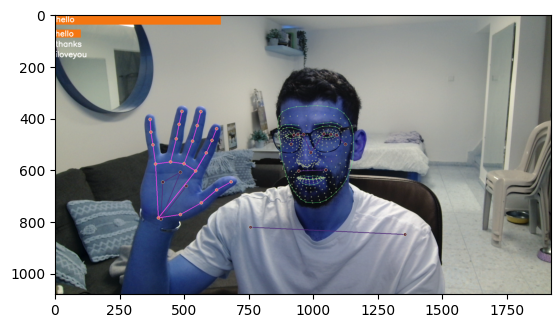

In [25]:
plt.imshow(image)